In [1]:
#!pip install tensorflow[and-cuda]
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 16.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 12.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
#!pip install pandas
!pip install networkx
!pip install matplotlib
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 4.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 16.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[n

In [45]:
import pandas as pd
from keras.src.layers import Bidirectional

from component_module import drop_static_columns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# for keras tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

import matplotlib.pyplot as plt
import numpy as np
from time import time
import os
import shutil

In [2]:
# Check if TensorFlow is built with CUDA support
if tf.config.list_physical_devices('GPU'):
    print("CUDA is available")
    print(f"Device: {tf.config.list_physical_devices('GPU')[0]}")
else:
    print("CUDA is not available")

CUDA is available
Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


I0000 00:00:1726745950.986475    5034 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726745951.105976    5034 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726745951.106520    5034 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355



df = pd.read_csv("/home/loz/Documents/GitHub/MSc-Project/SWaT DataSWaT 2015-12-23.csv")

#df.head()
df,  dropped_cols= drop_static_columns(df)
# convert time to seconds since midnight
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['time_in_seconds'] = (df['Timestamp'].dt.hour * 3600 + df['Timestamp'].dt.minute * 60 + df['Timestamp'].dt.second)              
df.set_index('time_in_seconds', inplace=True)
df.drop(columns=['Timestamp', 'time'], inplace=True)

# normalised data
scaler = StandardScaler()
df_normalised = scaler.fit_transform(df)
# convert back to df
df_normalised = pd.DataFrame(df_normalised, columns=df.columns)
df_normalised.to_csv("/home/loz/Documents/GitHub/MSc-Project/SWaT_2015_12_23_for_tf.csv",index=False)



In [5]:
df = pd.read_csv("/home/loz/MSc/MSc_Project/SWaT_2015_12_23_for_tf.csv")

In [6]:
df.head()

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,P602
0,-1.608031,1.824135,-1.55021,0.585352,2.475287,-0.112313,0.578473,0.085272,0.579321,-1.699887,...,1.386669,0.072135,0.363321,-0.274278,-0.576233,-0.282796,-1.05009,-0.233109,-0.096308,-0.088802
1,-1.608031,1.821131,-1.55021,0.585352,2.475287,-0.112313,0.581718,0.306260,0.579321,0.588275,...,1.386669,0.072135,-0.623212,-0.274278,0.735024,-0.328344,-1.05009,-0.233109,-0.096308,-0.088802
2,-1.608031,1.821131,-1.55021,0.585352,2.475287,-0.112313,0.589288,0.430235,0.579321,0.588275,...,1.386669,0.072135,-0.723537,-0.274278,0.735024,-0.442179,-1.05009,-0.246041,-0.096308,-0.088802
3,-1.608031,1.820797,-1.55021,0.585352,2.341305,-0.124024,0.597939,0.512685,0.579321,0.588275,...,1.386669,0.072135,-0.297175,0.905646,0.735024,-0.442179,-1.05009,-0.362587,-0.096308,-0.088802
4,-1.608031,1.818460,-1.55021,0.585352,2.341305,-0.124024,0.610196,0.565044,0.579321,0.588275,...,1.386669,0.072135,0.681068,0.905646,0.735024,-0.294165,-1.05009,-0.362587,-0.096308,-0.088802


In [7]:
component_map = list(df.columns)
len(component_map)

37

In [8]:
# check data is in time order
#df.sort_values(by='time_in_seconds', inplace=True)

In [9]:
df_test = df
df_test.shape

(86400, 37)

In [10]:
#df_test.set_index('time_in_seconds', inplace=True)
data_array = df_test.to_numpy()




In [11]:
# shape of array
data_array.shape

(86400, 37)

In [12]:
# dataset in single slices of array so 1 second rows
#dataset.element_spec

In [13]:
# Window size in seconds
window_size = 20
# Define batch of windows to process in parallel before updating weights 
batch_size = 32


def windowed_dataset(data_array, window_size, batch_size):
    '''
    get full dataset as np array
    :param series: 
    :param window_size: 
    :param batch_size: 
    :return: 
    '''
    
    # Create a TensorFlow dataset from the NumPy array
    dataset = tf.data.Dataset.from_tensor_slices(data_array)

    # Window the dataset into n second long slices with a 1 sec shift between each
    dataset = dataset.window(size=window_size, shift=1, drop_remainder=True)
    
    # Flatten the windowed dataset for input layer
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    
    # Split window into features and labels (last row)
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    
    # batch 
    dataset = dataset.batch(batch_size)
    
    # set indefinite repeat to allow looping back through
    #dataset = dataset.repeat()
    
    return dataset
    
    

In [14]:
split_time = int(data_array.shape[0] * 0.8)
train_dataset = data_array[:split_time]
val_dataset = data_array[split_time:]
train_dataset.shape
val_dataset.shape

(17280, 37)

In [15]:
train_dataset = windowed_dataset(train_dataset, window_size, batch_size)
val_dataset = windowed_dataset(val_dataset, window_size, batch_size)

I0000 00:00:1726754062.619481   36660 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726754062.676957   36660 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726754062.677219   36660 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726754062.678981   36660 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [16]:
# Check the first window
for features, label in train_dataset.take(1):
    print("Features shape: ", features.shape)  # Should be (19, 37)
    print("Label shape: ", label.shape)        # Should be (37,)

Features shape:  (32, 19, 37)
Label shape:  (32, 1, 37)


2024-09-19 14:54:23.208230: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
# Count the number of windows
num_windows = train_dataset.reduce(0, lambda x, _: x + 1).numpy() * batch_size


print(f"Number of windows: {num_windows}")

Number of windows: 69120


# split data
train_size = int(0.8 * num_windows)
train_dataset = windowed_dataset.take(train_size)
val_dataset = windowed_dataset.skip(train_size)

# batch data
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

In [18]:
for feature, lable in train_dataset.take((1)):
    print(feature.numpy().shape)

(32, 19, 37)


2024-09-19 14:54:27.073582: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
(window_size - 1, data_array.shape[1])

(19, 37)

# Hyperparameter Optimisation



In [20]:
# Directory for model performance logs
LOG_DIR = os.path.join("my_tuner_logs")

In [69]:
BI_LOG_DIR = os.path.join("my_bi_tuner_logs")

In [82]:
def build_model():
    '''
    Function to build model based on hyper parameters passed by random search
    
    params:
    hp: Hyper parameters passed by random search
     
    returns: 
    model: Keras model
    
    '''
    # Define the model
    model = Sequential()
    
   
    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array.shape[1])))
    
    # Add an LSTM layer with 50 units (neurons) and 
    model.add(LSTM(50))
    
    # Dense output layer predicting the next timestep
    model.add(Dense(data_array.shape[1])) 
    
    optimizer = Adam(learning_rate=0.00005)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    # Print model summary
    model.summary()
    
    # epochs is number of times to iterate through whole dataset
    epochs = 10
    
    batch_size = 32
    # floor steps per epoch calculated to avoid error
    steps_per_epoch = num_windows // batch_size 
    
    return model #, epochs, steps_per_epoch



In [83]:
def build_bi_model():
    '''
    Function to build model based on hyper parameters passed by random search
    
    params:
    hp: Hyper parameters passed by random search
     
    returns: 
    model: Keras model
    
    '''
    # Define the model
    model = Sequential()
    
    
    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array.shape[1])))
    
    # Add bidirectional LSTM layer with 50 units (neurons) 
    model.add(Bidirectional(LSTM(50)))
       
    
    # Dense output layer predicting the next timestep
    model.add(Dense(data_array.shape[1])) 
    
    optimizer = Adam(learning_rate=0.00005)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    # Print model summary
    model.summary()
    
    # epochs is number of times to iterate through whole dataset
    epochs = 10
    
    batch_size = 32
    
    # floor steps per epoch calculated to avoid error
    steps_per_epoch = num_windows // batch_size 
    
    return model #, epochs, steps_per_epoch



In [124]:
def build_model_tuner(hp):
    '''
    Function to build model based on hyper parameters passed by random search
    
    params:
    hp: Hyper parameters passed by random search
     
    returns: 
    model: Keras model
    
    '''
    # Define the model
    model = Sequential()
    

    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array.shape[1])))
    
    # Range of LSTM units for tuner
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=16)
    # Add an LSTM layer with tuner range 
    model.add(LSTM(units=lstm_units))
    
    # Tune the number of units in the dense layer
    dense_units = hp.Int('dense_units', min_value=32, max_value=128, step=16)
    model.add(Dense(dense_units, activation='relu'))
    
    # Dense output layer predicting the next timestep
    model.add(Dense(data_array.shape[1])) 
    
    # Tune the learning rate for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-6, max_value=1e-3, sampling='LOG')
    
    
    optimizer = Adam(learning_rate=learning_rate)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model #, epochs, steps_per_epoch



In [125]:
def build_bi_model_tuner(hp):
    '''
    Function to build model based on hyper parameters passed by random search
    
    params:
    hp: Hyper parameters passed by random search
     
    returns: 
    model: Keras model
    
    '''
    # Define the model
    model = Sequential()
    

    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array.shape[1])))
    
    # Range of LSTM units for tuner
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=16)
    # Add an bidirectional LSTM layer with tuner range 
    model.add(Bidirectional(LSTM(units=lstm_units)))
    
    # Tune the number of units in the dense layer
    dense_units = hp.Int('dense_units', min_value=32, max_value=128, step=16)
    model.add(Dense(dense_units, activation='relu'))
    
    # Dense output layer predicting the next timestep
    model.add(Dense(data_array.shape[1])) 
    
    # Tune the learning rate for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-6, max_value=1e-3, sampling='LOG')
    
    
    optimizer = Adam(learning_rate=learning_rate)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    
    return model #, epochs, steps_per_epoch



In [117]:
def build_best_model(tuner):
    '''
    Function to build model based on hyper parameters 
    
    params:
    params_dict: params returned from tuner including lstm, dense layer and learning rate
     
    returns: 
    model: Keras model
    
    '''
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    lstm_units = best_hps.values['lstm_units']
    dense_units = best_hps.values['dense_units']
    learning_rate = best_hps.values['learning_rate']

    # Define the model
    model = Sequential()
    
    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array.shape[1])))
    
    # Add an LSTM layer with best number of units (neurons)
    model.add(LSTM(lstm_units))
    
    # add dense layer
    model.add(Dense(dense_units, activation='relu'))
    
    # Dense output layer predicting the next timestep
    model.add(Dense(data_array.shape[1])) 
    
    optimizer = Adam(learning_rate=learning_rate)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model



In [99]:
def build_best_bi_model(bi_tuner):
    '''
    Function to build model based on hyper parameters 
    
    params:
    params_dict: params returned from tuner including lstm, dense layer and learning rate
     
    returns: 
    model: Keras model
    
    '''
    best_hps = bi_tuner.get_best_hyperparameters(num_trials=1)[0]
    
    lstm_units = best_hps.values['lstm_units']
    dense_units = best_hps.values['dense_units']
    learning_rate = best_hps.values['learning_rate']

    # Define the model
    model = Sequential()
    
    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array.shape[1])))
    
    # Add bidirectional LSTM layer with 50 units (neurons) 
    model.add(Bidirectional(LSTM(lstm_units)))
    
    # add dense layer
    model.add(Dense(dense_units, activation='relu'))
    
    # Dense output layer predicting the next timestep
    model.add(Dense(data_array.shape[1])) 
    
    optimizer = Adam(learning_rate=learning_rate)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model



In [51]:
LOG_DIR

'my_tuner_logs'

In [114]:
# Clear logs to run tuner from scratch
if os.path.exists(LOG_DIR):
    shutil.rmtree(LOG_DIR)  # Deletes the directory and its contents


# keras tuner to find optimum model
tuner = RandomSearch(build_model_tuner,
                     objective = "val_loss",
                     max_trials = 5,
                     executions_per_trial = 1,
                     directory = LOG_DIR,
                     project_name = "lstm_all_data"
                     )

In [104]:
# Clear logs to run tuner from scratch
if os.path.exists(BI_LOG_DIR):
    shutil.rmtree(BI_LOG_DIR)  # Deletes the directory and its contents
    
# keras tuner to find optimum model
bi_tuner = RandomSearch(build_bi_model_tuner,
                     objective = "val_loss",
                     max_trials = 5,
                     executions_per_trial = 1,
                     directory = BI_LOG_DIR,
                     project_name = "lstm_all_data"
                     )

## Tuner Version

In [115]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the tuner
tuner.search(
    train_dataset,  # Pass your windowed and batched training dataset
    epochs=10,
    validation_data=val_dataset,  # Pass your windowed and batched validation dataset
    callbacks=[early_stop]
)

Trial 5 Complete [00h 00m 48s]
val_loss: 1.269281029701233

Best val_loss So Far: 0.16483548283576965
Total elapsed time: 00h 04m 09s


In [73]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the tuner
bi_tuner.search(
    train_dataset,  # Pass your windowed and batched training dataset
    epochs=10,
    validation_data=val_dataset,  # Pass your windowed and batched validation dataset
    callbacks=[early_stop]
)

Trial 5 Complete [00h 01m 43s]
val_loss: 0.22782683372497559

Best val_loss So Far: 0.2219981700181961
Total elapsed time: 00h 11m 14s


In [53]:
# Best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")

Best hyperparameters:
lstm_units: 80
dense_units: 64
learning_rate: 5.164419548491746e-05


5.164419548491746e-05

In [55]:
# Best model
best_simple_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

/home/loz/MSc/MSc_Project/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 80)             │        37,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 37)             │         2,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,349 (177.14 KB)

 Trainable params: 45,349 (177.14 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Rebuild the model and load weights from the best model
best_simple_model = build_best_model(tuner)

In [ ]:
# Train the model using the already windowed dataset
# Ensure the dataset is batched before training
best_history = best_model.fit(
    train_dataset,
    epochs=40,
    #steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset
)

In [ ]:
# Train the model using the already windowed dataset
# Ensure the dataset is batched before training
best_simple_history = best_simple_model.fit(
    train_dataset,
    epochs=20,
    #steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset
)

In [42]:
best_history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

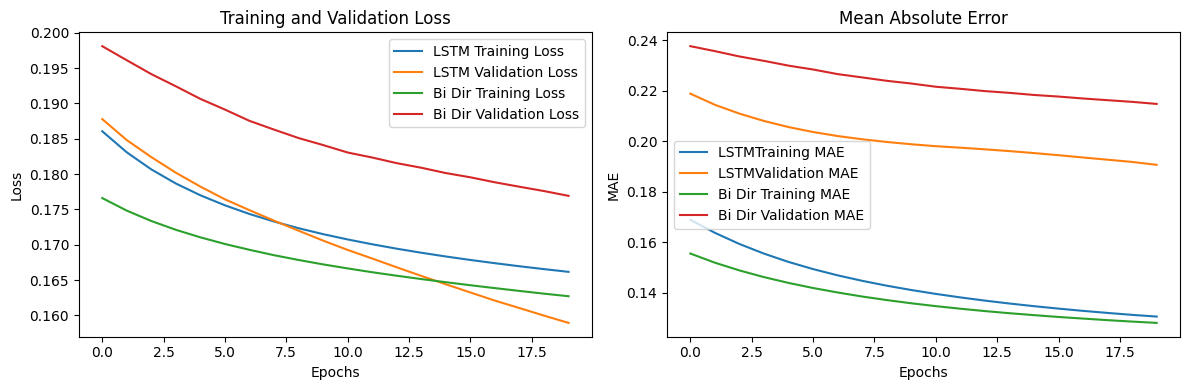

In [121]:
compare_models(best_history, best_bi_history, "LSTM", "Bi Dir")

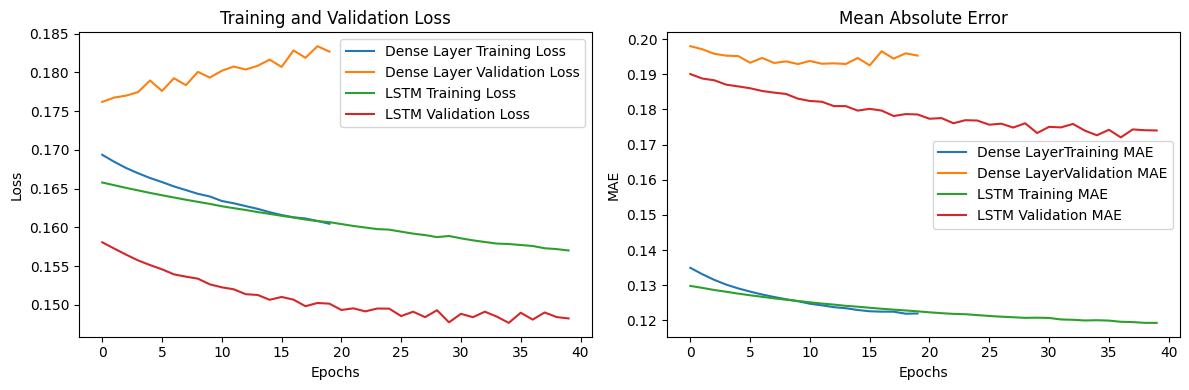

In [126]:
compare_models(best_simple_history, best_history, "Dense Layer", "LSTM")

In [118]:
# Rebuild the model and load weights from the best model no lstm
best_dense_model = build_best_model(tuner)

In [ ]:
# Train the model using the already windowed dataset
# Ensure the dataset is batched before training
best_dense_history = best_dense_model.fit(
    train_dataset,
    epochs=40,
    #steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset
)

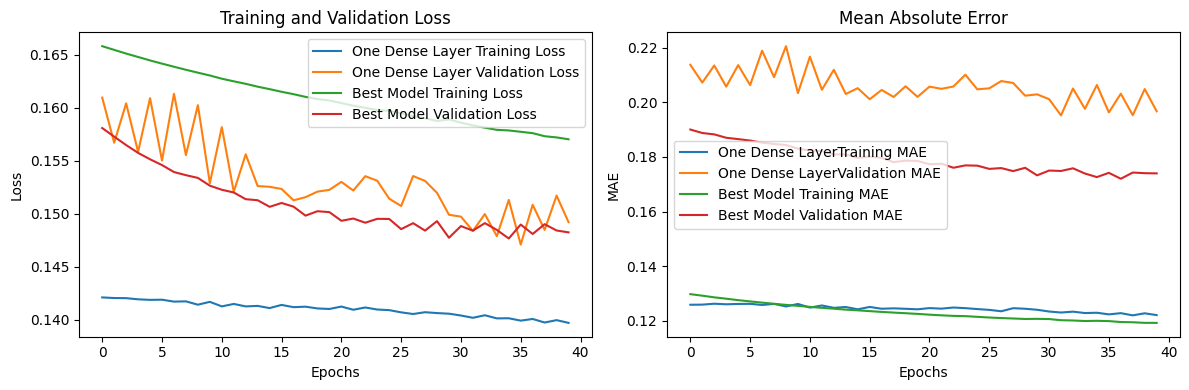

In [130]:
compare_models(best_dense_history, best_history, "One Dense Layer", "Best Model")

# Bi Directional

In [74]:
# Best hyperparameters
best_bi_hps = bi_tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for key, value in best_bi_hps.values.items():
    print(f"{key}: {value}")

Best hyperparameters:
lstm_units: 96
dense_units: 64
learning_rate: 0.0005844956795537632


In [76]:
# Rebuild the model and load weights from the best model
best_bi_model = build_best_bi_model(tuner)

In [ ]:
# Train the model using the already windowed dataset
# Ensure the dataset is batched before training
best_bi_history = best_bi_model.fit(
    train_dataset,
    epochs=40,
    #steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset
)

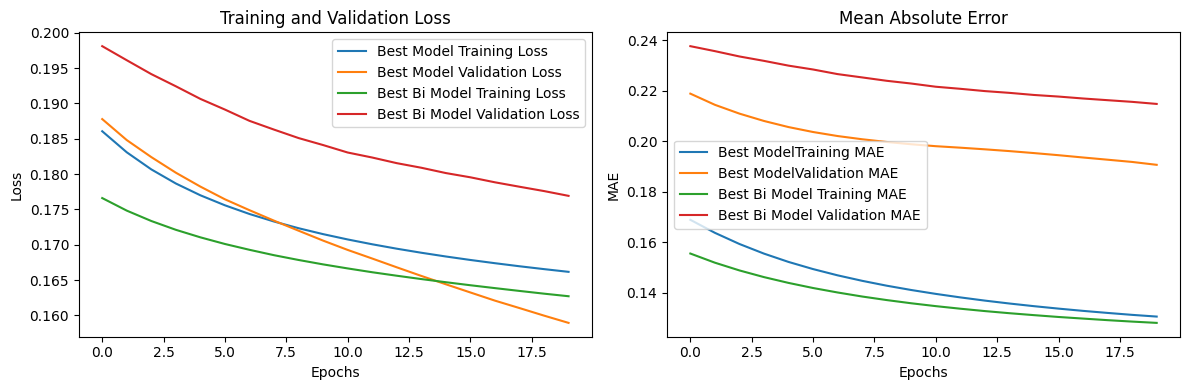

In [122]:
compare_models(best_history, best_bi_history, "Best Model", "Best Bi Model")

## Original Models

In [85]:
model = build_model()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        17,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 37)             │         1,887 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,487 (76.12 KB)

 Trainable params: 19,487 (76.12 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
bi_model = build_bi_model()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 100)            │        35,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 37)             │         3,737 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,937 (152.10 KB)

 Trainable params: 38,937 (152.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the already windowed dataset
# Ensure the dataset is batched before training
history = model.fit(
    train_dataset,
    epochs=20,
    #steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset
)


In [ ]:
# Train the model using the already windowed dataset
# Ensure the dataset is batched before training
bi_history = bi_model.fit(
    train_dataset,
    epochs=20,
    #steps_per_epoch=bi_steps_per_epoch,
    validation_data=val_dataset
)



In [46]:
#history_dict['val_mae']

[0.30992981791496277,
 0.3008570373058319,
 0.28729987144470215,
 0.2620809078216553,
 0.2625470459461212,
 0.269218385219574,
 0.2402947098016739,
 0.24070829153060913,
 0.26532796025276184,
 0.2421676367521286,
 0.24359402060508728,
 0.2437315434217453,
 0.24171429872512817,
 0.261157363653183,
 0.252514123916626]

In [44]:
#history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

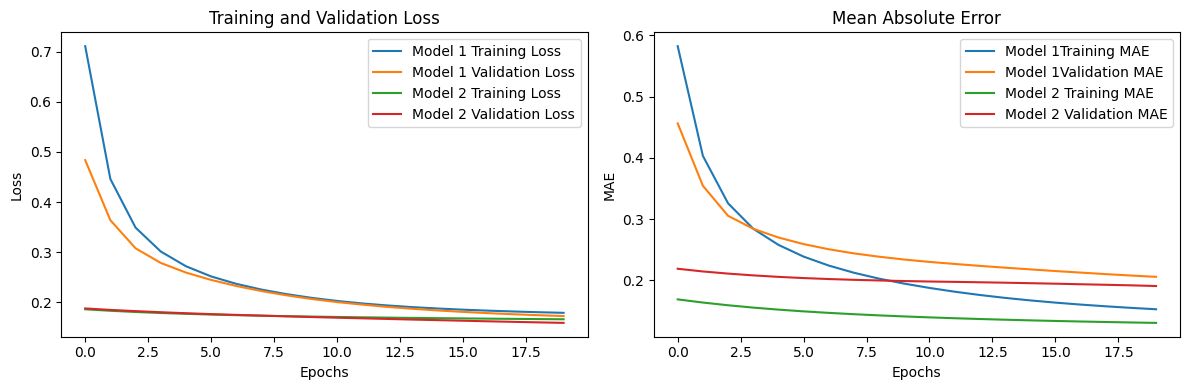

In [89]:
compare_models(history, best_history)

In [36]:
def compare_models(history_1, history_2, history_1_name="Model 1", history_2_name="Model 2"):  
    
    # Assuming `history` is the output from model.fit()
    
    history_1_dict = history_1.history
    history_2_dict = history_2.history
    
    # Plot training & validation loss
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history_1_dict['loss'], label=f'{history_1_name} Training Loss')
    if 'val_loss' in history_1_dict:
        plt.plot(history_1_dict['val_loss'], label=f'{history_1_name} Validation Loss')
        
    plt.plot(history_2_dict['loss'], label=f'{history_2_name} Training Loss')
    if 'val_loss' in history_2_dict:
        plt.plot(history_2_dict['val_loss'], label=f'{history_2_name} Validation Loss')
        
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy (if available)
    plt.subplot(1, 2, 2)
    
    if 'mae' in history_1_dict:
        plt.plot(history_1_dict['mae'], label=f'{history_1_name}Training MAE')
    if 'val_mae' in history_1_dict:
        plt.plot(history_1_dict['val_mae'], label=f'{history_1_name}Validation MAE')
     
    if 'mae' in history_2_dict:
        plt.plot(history_2_dict['mae'], label=f'{history_2_name} Training MAE')
    if 'val_mae' in history_2_dict:
        plt.plot(history_2_dict['val_mae'], label=f'{history_2_name} Validation MAE')  
    
    plt.title('Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    # Show the plots
    plt.tight_layout()
    plt.show()


In [16]:
model.save('swat_lstm_100s.keras')

In [131]:
# save best model from lstm tuner
model.save('best_model.keras')

# Open Saved Model

In [132]:
# Load the model from the SavedModel directory
# 20 secs
#swat_lstm = tf.keras.models.load_model('swat_lstm_1_0.keras')
swat_lstm = tf.keras.models.load_model('best_model.keras')
model_window = 20

In [133]:
# Reshape the input from data_array to add the batch dimension
reshaped_input = data_array[:model_window-1, :].reshape(1, model_window-1, data_array.shape[1])  # (1, 19, 37)

# Make predictions
predictions = swat_lstm.predict(reshaped_input)

# Print predictions
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[-1.4947877   1.5111489  -1.5294851   0.46055713  1.5532018  -0.2502494
   0.9073454   0.39110047  0.37197456  0.23689416 -0.4519086   0.51397663
   0.44551957 -1.6148962  -0.00376818  0.5700389  -0.25596654 -0.12836924
  -0.15428692  0.37524745 -0.93236744  0.6348754  -0.06639665 -1.1434228
  -0.580218    0.49040553  1.0834665   1.4541938   0.06663956  0.12214877
  -0.36197895  0.22159296 -0.3282902  -0.98204553 -0.37212285 -0.04321658
  -0.04052807]]


In [134]:
actual = data_array[model_window-1:model_window, :]

In [135]:
reshaped_input.shape

(1, 19, 37)

In [136]:
actual

array([[-1.60803075,  1.76371852, -1.55020996,  0.58535159,  2.22070402,
        -0.1669783 ,  0.76917457,  0.62257759,  0.57932135,  0.58827456,
        -0.92233481,  0.51314719,  0.46491464, -1.66441986, -0.04912496,
         0.48112757, -0.11892534, -0.12449482, -0.01128411,  0.46178413,
        -0.79145985,  0.82529652,  0.35576344, -1.24070149, -0.25999687,
         0.89191061,  1.02183375,  1.87791562,  0.05422527,  0.44693497,
        -1.07873873, -1.23190362, -0.15759159, -1.05009025, -0.24604088,
        -0.09630808, -0.08880187]])

In [137]:
difference = actual - predictions

# Print results
print("Predictions:\n", predictions)
print("Actual Values:\n", actual)
print("Difference:\n", difference)

Predictions:
 [[-1.4947877   1.5111489  -1.5294851   0.46055713  1.5532018  -0.2502494
   0.9073454   0.39110047  0.37197456  0.23689416 -0.4519086   0.51397663
   0.44551957 -1.6148962  -0.00376818  0.5700389  -0.25596654 -0.12836924
  -0.15428692  0.37524745 -0.93236744  0.6348754  -0.06639665 -1.1434228
  -0.580218    0.49040553  1.0834665   1.4541938   0.06663956  0.12214877
  -0.36197895  0.22159296 -0.3282902  -0.98204553 -0.37212285 -0.04321658
  -0.04052807]]
Actual Values:
 [[-1.60803075  1.76371852 -1.55020996  0.58535159  2.22070402 -0.1669783
   0.76917457  0.62257759  0.57932135  0.58827456 -0.92233481  0.51314719
   0.46491464 -1.66441986 -0.04912496  0.48112757 -0.11892534 -0.12449482
  -0.01128411  0.46178413 -0.79145985  0.82529652  0.35576344 -1.24070149
  -0.25999687  0.89191061  1.02183375  1.87791562  0.05422527  0.44693497
  -1.07873873 -1.23190362 -0.15759159 -1.05009025 -0.24604088 -0.09630808
  -0.08880187]]
Difference:
 [[-1.13243056e-01  2.52569593e-01 -2.072

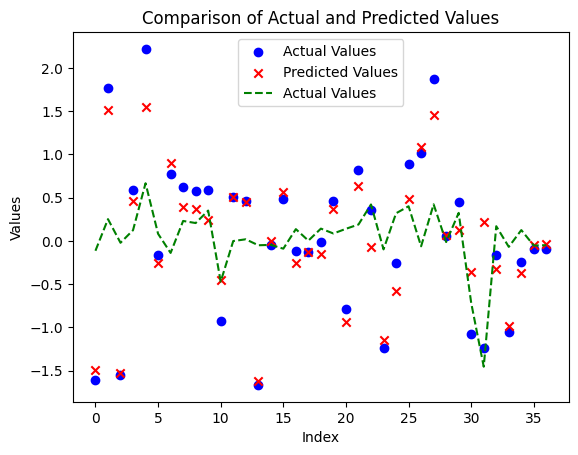

In [138]:
type(actual[0])
actual_list = list(actual[0])
predictions_list = list(predictions[0])
x_values = list(range(len(actual_list)))
difference = actual - predictions
difference_list = list(difference[0])
# Plot the actual values
plt.scatter(x_values, actual_list, color='blue', label='Actual Values', marker='o')

# Plot the predicted values
plt.scatter(x_values, predictions_list, color='red', label='Predicted Values', marker='x')

plt.plot(x_values, difference_list, color='green', label='Actual Values', linestyle='--')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [36]:
type(difference_list)

NameError: name 'difference_list' is not defined

# Predict Whole Dataset

In [177]:
split_time = int(data_array.shape[0] * 0.8)

val_dataset = data_array[split_time:]
##predict first 100 
predict_dataset = val_dataset[:1200]

In [202]:
#predict_dataset

In [179]:
#len(val_dataset)

In [205]:
#input_window.shape

(1, 19, 37)

In [180]:
# Define a list to hold all predictions
all_predictions = []

# Loop through the dataset and predict step by step
for i in range(len(predict_dataset) - model_window + 1):
    # Extract the window of input data for prediction
    input_window = predict_dataset[i:i+model_window-1, :].reshape(1, model_window-1, data_array.shape[1])
    
    # Predict the next timestep
    predicted = swat_lstm.predict(input_window)
    
    # Save the prediction
    all_predictions.append(predicted[0])

# Convert predictions list to numpy array
all_predictions = np.array(all_predictions)

# Get the actual data for comparison (the next step in each window)
actual_data = predict_dataset[model_window-1:, :]  # All rows starting from model_window-1


# Optionally, you can calculate some error metrics
mae = np.mean(np.abs(all_predictions - actual_data))
print(f"Mean Absolute Error: {mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [157]:
type(all_predictions)

numpy.ndarray

In [158]:
all_predictions.shape

(101, 37)

In [181]:
df_predictions = pd.DataFrame(all_predictions, columns=component_map)
df_predictions.info

<bound method DataFrame.info of         FIT101    LIT101     MV101      P101    AIT201    AIT202    AIT203  \
0     0.734209  0.372115  0.745545 -1.658615 -1.110966  0.022305 -1.076352   
1     0.730528  0.373395  0.745622 -1.654954 -1.111137  0.027698 -1.078906   
2     0.728361  0.381117  0.731999 -1.661024 -1.130457  0.027331 -1.106101   
3     0.715458  0.390516  0.716701 -1.671466 -1.136060  0.009567 -1.115966   
4     0.709673  0.402628  0.706980 -1.675713 -1.138280  0.001072 -1.121865   
...        ...       ...       ...       ...       ...       ...       ...   
1176 -1.575040  0.450838 -1.710543  0.525953 -1.027547 -0.491737 -1.072868   
1177 -1.587872  0.456746 -1.737377  0.523715 -1.017258 -0.492217 -1.063039   
1178 -1.597126  0.449800 -1.753431  0.537431 -1.017207 -0.484974 -1.052746   
1179 -1.604663  0.444665 -1.769420  0.545133 -1.012832 -0.481366 -1.042284   
1180 -1.588067  0.417740 -1.734418  0.547646 -1.036187 -0.517693 -1.041192   

        FIT201     MV201      P

In [182]:
predict_dataset = predict_dataset[window_size-1:]

In [183]:
df_actual = pd.DataFrame(predict_dataset, columns=component_map)
df_actual.info

<bound method DataFrame.info of         FIT101    LIT101     MV101      P101    AIT201    AIT202    AIT203  \
0     0.621924  0.403504  0.620586 -1.708375 -1.236362 -0.110357 -1.114771   
1     0.611540  0.409179  0.620586 -1.708375 -1.236362 -0.090836 -1.114771   
2     0.594702  0.412851  0.620586 -1.708375 -1.236362 -0.090836 -1.114771   
3     0.581512  0.413518  0.620586 -1.708375 -1.236362 -0.090836 -1.114771   
4     0.566357  0.421195  0.620586 -1.708375 -1.236362 -0.090836 -1.114771   
...        ...       ...       ...       ...       ...       ...       ...   
1176 -1.608031  0.474936 -1.550210  0.585352 -1.316776 -0.547685 -0.867832   
1177 -1.608031  0.470264 -1.550210  0.585352 -1.316776 -0.547685 -0.868913   
1178 -1.608031  0.470264 -1.550210  0.585352 -1.316776 -0.547685 -0.868913   
1179 -1.608031  0.464922 -1.550210  0.585352 -1.316776 -0.547685 -0.869273   
1180 -1.608031  0.461585 -1.550210  0.585352 -1.316776 -0.547685 -0.872518   

        FIT201     MV201      P

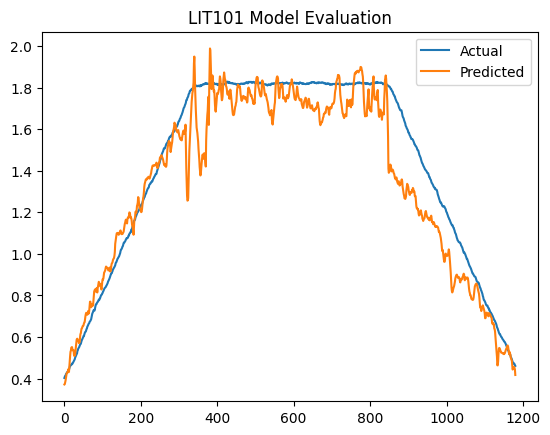

Mean Absolute Error: 0.10871452358344463


In [185]:
plt.plot(df_actual['LIT101'], label='Actual')
plt.plot(df_predictions['LIT101'], label='Predicted')

plt.title('LIT101 Model Evaluation')
plt.legend()
plt.show()
mae = np.mean(np.abs(df_predictions['LIT101'] - df_actual['LIT101']))
print(f"Mean Absolute Error: {mae}")

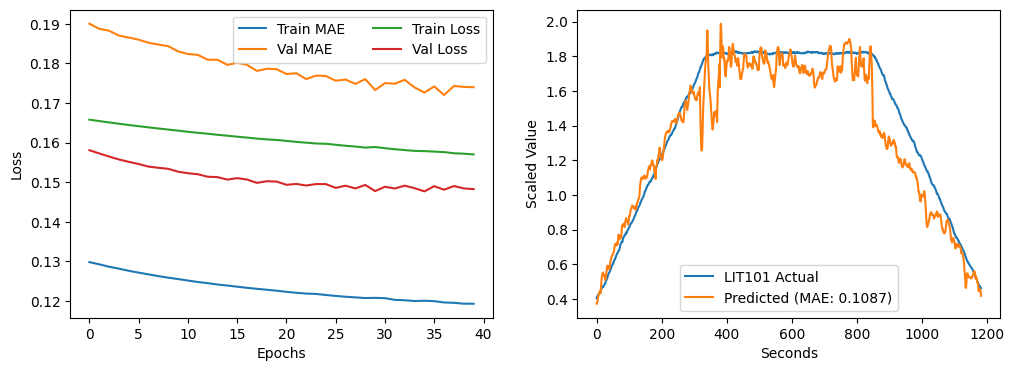

In [199]:
# Assuming `history` is the output from model.fit()

history_1_dict = best_history.history


# Plot training & validation loss
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)

if 'mae' in history_1_dict:
    plt.plot(history_1_dict['mae'], label='Train MAE')
if 'val_mae' in history_1_dict:
    plt.plot(history_1_dict['val_mae'], label='Val MAE')
    
if 'loss' in history_1_dict:
    plt.plot(history_1_dict['loss'], label='Train Loss')
if 'val_loss' in history_1_dict:
    plt.plot(history_1_dict['val_loss'], label='Val Loss')
        
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(ncol=2)

# Plot accuracy (if available)
plt.subplot(1, 2, 2)

plt.plot(df_actual['LIT101'], label='Actual')
plt.plot(df_predictions['LIT101'], label='Predicted')

mae = np.mean(np.abs(df_predictions['LIT101'] - df_actual['LIT101']))
plt.legend([f'LIT101 Actual', f'Predicted (MAE: {mae:.4f})'])


plt.xlabel('Seconds')
plt.ylabel('Scaled Value')

# Show the plots
#plt.tight_layout()

# Save the plot to a file (e.g., "plot.png")
plt.savefig('/home/loz/MSc/MSc_Project/Write_Up/Charts/LSTM_Eval.jpeg')
plt.show()

# Train Agent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [ ]:
print('test')